<a href="https://colab.research.google.com/github/Techbae22/Titanic-Survival-LR/blob/main/Titanic_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PREPROCESSING STAGE**

Library Setup


In [2]:
import pandas as pd

**IMPORTING THE DATASET**



In [3]:

df= pd.read_csv("titanic_data.csv", delimiter= ";" )

**SHOW THE HEAD OF THE DATASET**

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


**SHOWING SOME GENERAL INFOMATION ABOUT THE DATASET**


In [5]:
df.shape

(891, 12)

The dataset contains 12 columns and 891 rows of data
 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


**FINDING MISSING VALUES IN THE DATASET**


Finding missing values' positions in the dataset

In [7]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,True,False
888,False,False,False,False,False,False,False,False,False,False,True,False
889,False,False,False,False,False,True,False,False,False,False,True,False


Finding the number of missing values in each column

In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

'AGE' has a total number of 177 missing values while 'CABIN' has 687 and 'EMBARKED' 2

**REPLACING MISSING NUMERICAL VALUES WITH APPROPRIATE VALUES**

Replacing missing numerical values of the "Age" feature

In [9]:
df["Age"].fillna(df["Age"].mean(), inplace= True)

**REPLACING MISSING CATEGORICAL VALUES WITH THE APPROPRIATE VALUES**

Number of Elements per Category of the "Cabin" Feature

In [10]:
print(df["Cabin"].value_counts())

G6             4
B96 B98        4
C23 C25 C27    4
F33            3
D              3
              ..
C91            1
D45            1
F G63          1
A34            1
E63            1
Name: Cabin, Length: 147, dtype: int64


Replacing Missing Categorical Values of the "Cabin" Feature


In [11]:
df["Cabin"].fillna("G6", inplace= True)

Number of Elements per Category of the "Embarked" Feature

In [12]:
print(df["Embarked"].value_counts())

S    644
C    168
Q     77
Name: Embarked, dtype: int64


Replacing Missing Categorical Values of the "Embarked" Feature

In [13]:
df["Embarked"].fillna("S", inplace= True)

Verifiy that Data clean

In [14]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

**VISUALIZATION STAGE**

Distribution of the most important features

Feature Distribution of "Age"

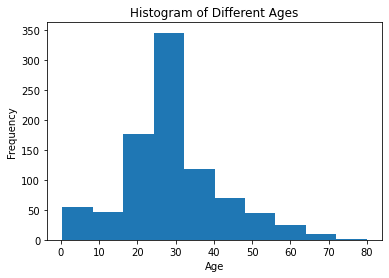

In [15]:
import matplotlib.pyplot as plt 
plt.title ("Histogram of Different Ages")
plt.xlabel("Age")
df["Age"].plot.hist()

Feature Distribution of "Sex"

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

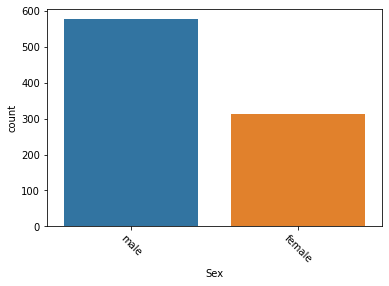

In [16]:
import seaborn as sns
sns.countplot(x= "Sex", data= df)
plt.xticks(rotation=-45)

Feature Distribution of "Pclass"

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

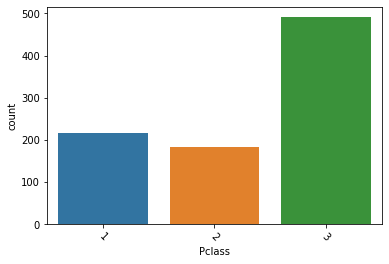

In [17]:
sns.countplot(x= "Pclass", data= df)
plt.xticks(rotation=-45)

From the above plot, we can tell that majority of the passengers are in the 3rd class

Feature Distribution of "Embarked"

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

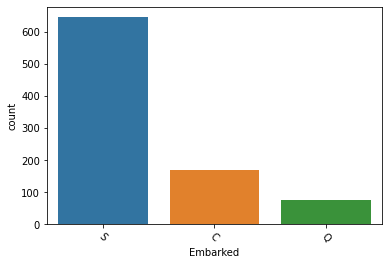

In [18]:
sns.countplot(x= "Embarked",data= df)
plt.xticks(rotation=-45)

There are 3 major ports of embarkation -  C = Cherbourg, Q = Queenstown, S = Southampton. From the above plot, we can see that majority of passengers embarked at S (Southampton).

**Correlation between "Age" and "Sex"**

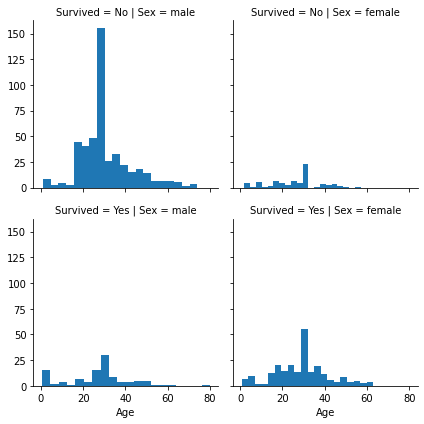

In [19]:
g=sns.FacetGrid(df, row= "Survived", col="Sex")
g.map(plt.hist, "Age", bins=20)

**Correlation between "Embarked" and "Pclass"**

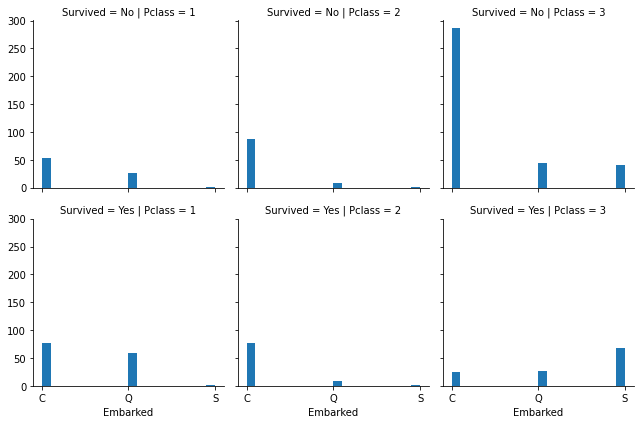

In [20]:
grid=sns.FacetGrid(df, row= "Survived", col="Pclass")
grid.map(plt.hist, "Embarked", bins=20)

**Correlation Heatmap**

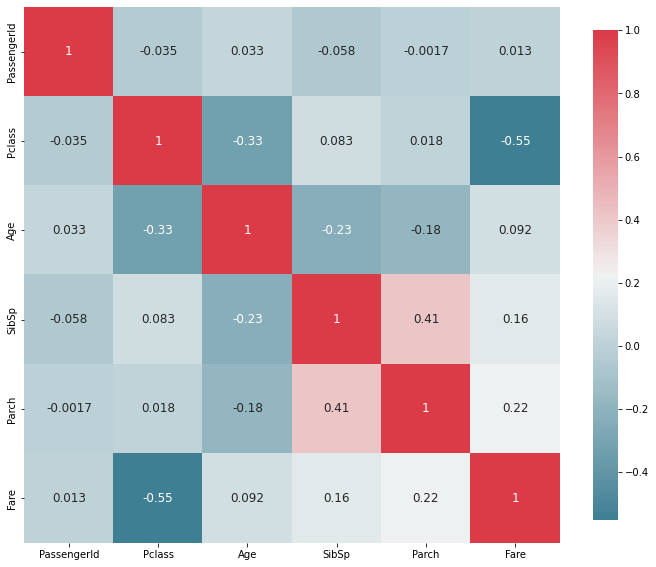

In [20]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }
        
    )

plot_correlation_map(df)

To start with, the number of male passengers we extracted from the "Sex" feature distribution is much higher than the number of female passengers. From the correlation between "Age" and "Sex" features above, we can deduce that females are more likely to survive than males. Also, according to the "Age" feature distribution, most passengers are in 15-35 years range. However, a large number of passengers that are between 15 and 25 years old did not survive the incident. We then visualized the correlation between "Pclass" and "Embarked" features which supplied us with the information that the 3rd class passengers are more likely to be dead than other classes and 1st class passengers are more likely to survive than other classes. In addition, passengers who embarked at C had a higher survival rate than people who embarked at S or Q. Last but not least, the function we defined was used to build a correlation heatmap which is, in fact, a graphical representation of correlation matrix representing correlation between all the different features of our dataset. The value of correlation can take any values between -1 and 1. Values closer to zero means there is no linear relationship between the two variables. The closer to 1 the correlation is, the more positively correlated the variables are. The closer to -1 the correlation is, the more negatively correlated the variables are. For example, the correlation between SibSp and Parch variables is equal to 0.41. They are somehow considered to have a moderate positive relationship which means that parents and siblings like to travel together. Also, the correlation between Pclass and Fare variables is equal to -0.55. They have a strong negative correlation which means that higher economic classes ("Pclasses") pay more for their trip ("Fare").

**Correlation grouby between "Pclass" and "Survived"**

In [21]:
cleanup= {"Survived": {"No":0,"Yes":1}}
df.replace(cleanup, inplace=True)
df[["Pclass","Survived"]].groupby(["Pclass"], as_index=True).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


**Drop useless columns**

We are dropping columns like "PassengerId", "Name", "Ticket", "Cabin" because we feel it may not be useful for Machine Learning prediction.

In [22]:
new_data= df.copy()
new_data= new_data.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis=1)
new_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,2,male,28.0,0,0,13.0000,S
1,0,3,male,25.0,0,0,7.6500,S
2,0,3,male,20.0,0,0,7.8542,S
3,0,3,female,29.0,0,4,21.0750,S
4,0,1,male,31.0,1,0,52.0000,S


**Creating a new column "Title"**



In [23]:
new_data['Title'] = df.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())
new_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,2,male,28.0,0,0,13.0000,S,Mr
1,0,3,male,25.0,0,0,7.6500,S,Mr
2,0,3,male,20.0,0,0,7.8542,S,Mr
3,0,3,female,29.0,0,4,21.0750,S,Mrs
4,0,1,male,31.0,1,0,52.0000,S,Mr


**Listing the Number of Elements per Category of the "Title" Feature**

In [24]:
print(new_data["Title"].value_counts())

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Col               2
Major             2
Don               1
Lady              1
Jonkheer          1
Mme               1
Sir               1
Capt              1
the Countess      1
Ms                1
Name: Title, dtype: int64


**Correlation between "Title" and "Age"**

In [25]:
new_data[["Age", "Title"]].groupby(["Title"], as_index=True).mean()

,Age
Title,
Capt,70.000000
Col,58.000000
Don,40.000000
Dr,40.242731
Jonkheer,38.000000
Lady,48.000000
Major,48.500000
Master,7.086662
Miss,23.341584


**Correlation between "Title" and "Fare"**

In [26]:
new_data[["Fare", "Title"]].groupby(["Title"], as_index=True).mean()

,Fare
Title,
Capt,71.000000
Col,31.025000
Don,27.720800
Dr,49.168457
Jonkheer,0.000000
Lady,39.600000
Major,28.525000
Master,34.703125
Miss,43.797873


**Correlation between "Title" and "Pclass"**

In [27]:
new_data[["Pclass", "Title"]].groupby(["Title"], as_index=True).mean()

,Pclass
Title,
Capt,1.000000
Col,1.000000
Don,1.000000
Dr,1.285714
Jonkheer,1.000000
Lady,1.000000
Major,1.000000
Master,2.625000
Miss,2.307692


**Correlation between "Title" and "Sex"**

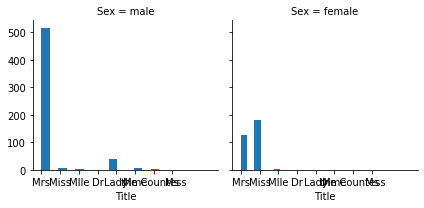

In [28]:
g=sns.FacetGrid(new_data, col="Sex")
g.map(plt.hist, "Title", bins=20)

**Creating a Dictionary**

In [29]:
Title_Dictionary={"Capt": "Officer",
                  
                  "Col": "Officer", 
                  
                  "Major": "Officer",
                  
                  "Dr": "Officer", 
                  
                  "Rev": "Officer",
                  
                  "Jonkheer": "Royalty",
                  
                  "Don": "Royalty", 
                  
                  "Sir": "Royalty",
                  
                  "Lady": "Royalty",
                  
                  "the Countess": "Royalty",
                  
                  "Dona": "Royalty", 
                  
                  "Mme": "Miss",
                  
                  "Mlle": "Miss",
                  
                  "Miss": "Miss",
                  
                  "Ms": "Mrs", 
                  
                  "Mr": "Mrs",
                  
                  "Mrs": "Mrs", 
                  
                  "Master": "Master" 
}

**Include the Dictionary as "Title" to the Dataset**

In [30]:
new_data['Title'] = new_data['Title'].map(Title_Dictionary)
new_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,2,male,28.0,0,0,13.0000,S,Mrs
1,0,3,male,25.0,0,0,7.6500,S,Mrs
2,0,3,male,20.0,0,0,7.8542,S,Mrs
3,0,3,female,29.0,0,4,21.0750,S,Mrs
4,0,1,male,31.0,1,0,52.0000,S,Mrs


**New Number of Elements per Category of the new Feature, "Title"**

In [31]:
print(new_data["Title"].value_counts())

Mrs        643
Miss       185
Master      40
Officer     18
Royalty      5
Name: Title, dtype: int64


**Let's do some more Visualizations**

**Between "Title" and "Age"**

In [32]:
new_data[["Age", "Title"]].groupby(["Title"], as_index=True).mean()

,Age
Title,
Master,7.086662
Miss,23.352261
Mrs,32.389705
Officer,45.761062
Royalty,41.600000


**Between "Title" and "Fare"**

In [33]:
new_data[["Fare", "Title"]].groupby(["Title"], as_index=True).mean()

,Fare
Title,
Master,34.703125
Miss,44.104416
Mrs,28.447283
Officer,35.786344
Royalty,42.150000


**Between "Title" and "Pclass"**

In [34]:
new_data[["Pclass", "Title"]].groupby(["Title"], as_index=True).mean()

,Pclass
Title,
Master,2.625000
Miss,2.286486
Mrs,2.329705
Officer,1.444444
Royalty,1.000000


**Between "Title" and "Sex"**

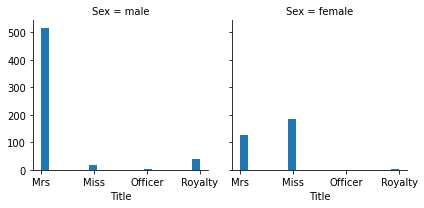

In [35]:
g=sns.FacetGrid(new_data, col="Sex")
g.map(plt.hist, "Title", bins=20)

**Creating a new Feature "FamilySize" from "SibSp" and "Parch" Features**

In [36]:
new_data["FamilySize"]= new_data["SibSp"]+new_data["Parch"]
new_data= new_data.drop("SibSp", axis= 1)
new_data= new_data.drop("Parch", axis= 1)

**Show the Head of the New Dataset**

In [37]:
new_data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize
0,0,2,male,28.0,13.0000,S,Mrs,0
1,0,3,male,25.0,7.6500,S,Mrs,0
2,0,3,male,20.0,7.8542,S,Mrs,0
3,0,3,female,29.0,21.0750,S,Mrs,4
4,0,1,male,31.0,52.0000,S,Mrs,1


**Correlation between "Survived" and the new Feature, "FamilySize"**

In [38]:
new_data[["Survived", "FamilySize"]].groupby(["FamilySize"], as_index=True).mean()

,Survived
FamilySize,
0,0.303538
1,0.552795
2,0.578431
3,0.724138
4,0.200000
5,0.136364
6,0.333333
7,0.000000
10,0.000000


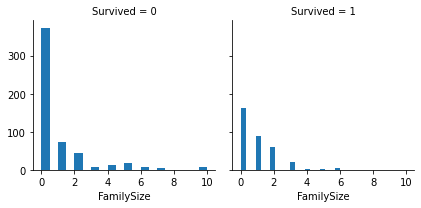

In [39]:
g=sns.FacetGrid(new_data, col="Survived")
g.map(plt.hist, "FamilySize", bins=20)

"FamilySize" feature is useful as it shows us that survival rates are better when passengers are accompanied rather than alone.

**"Title" Feature Transformation**

In [40]:
from sklearn.preprocessing import LabelEncoder

In [41]:
encoder=LabelEncoder()
new_data["Title"]=encoder.fit_transform(new_data["Title"])
new_data["Embarked"]=encoder.fit_transform(new_data["Embarked"])
new_data["Sex"]=encoder.fit_transform(new_data["Sex"])
new_data

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize
0,0,2,1,28.000000,13.0000,2,2,0
1,0,3,1,25.000000,7.6500,2,2,0
2,0,3,1,20.000000,7.8542,2,2,0
3,0,3,0,29.000000,21.0750,2,2,4
4,0,1,1,31.000000,52.0000,2,2,1
...,...,...,...,...,...,...,...,...
886,1,2,0,14.000000,30.0708,0,2,1
887,0,3,1,22.000000,7.2292,0,2,0
888,0,3,0,30.000000,8.6625,2,1,0
889,0,3,1,29.699118,7.8958,2,2,0


**Logistic Regression**

Applying Logistic Regression to the dataset

First, we Extract the Features

In [42]:
X = new_data[["Pclass", "Age", "Sex", "FamilySize", "Embarked"]]
y = new_data["Survived"]

**We split dataset into train and test sets**

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

**Build our Logistic Model**

Here, we take by default 0.5 as a threshold.

If p >= 0.5, then the passenger has survived.

If p < 0.5, then the passenger did not survive.

In [45]:
from sklearn.linear_model import LogisticRegression

In [46]:
logreg = LogisticRegression() 

**Fitting the Training Data**

In [47]:
logreg.fit(X_train, y_train)

LogisticRegression()

**Testing the Model's Performance**

In [48]:
y_pred  = logreg.predict(X_test)  

**Performance of the Logistic Regression**

In [49]:
from sklearn import metrics

In [50]:
print("Accuracy={:.2f}".format(logreg.score(X_test, y_test)))

Accuracy=0.84


The model predicted whether passengers survived or not at an 84% accuracy.

**Finding the threshold that maximizes accuracy in Logistic Regression**

In [51]:
import numpy as np
from sklearn.metrics import balanced_accuracy_score

We would have to first run through all the scores and store the accuracies in a list.

In [52]:
threshold = []
accuracy = []

for p in np.unique(logreg.predict_proba(X_train)[:,1]):
  threshold.append(p)
  y_pred = (logreg.predict_proba(X_train)[:,1] >= p).astype(int)
  accuracy.append(balanced_accuracy_score(y_train,y_pred))

Now we proceed to plot

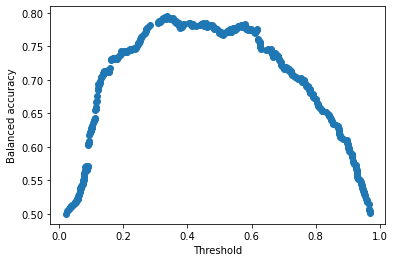

In [53]:
plt.scatter(threshold,accuracy)
plt.xlabel("Threshold")
plt.ylabel("Balanced accuracy")
plt.show()

As you can see, we have a maximum slightly before 0.4. The correct value is:

In [56]:
print("Threshold that maximizes accuracy: ",threshold[np.argmax(accuracy)])

Threshold that maximizes accuracy:  0.33554915562808135


So, we can conclude this this is the threshold we are looking for.

Changing the Default Threshold for Logistic Regression

In [57]:
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score

In [58]:
X, y = make_classification(
    n_classes=2, class_sep=1.5, weights=[0.9, 0.1],
    n_features=20, n_samples=1000, random_state=10
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

logreg = LogisticRegression(class_weight="balanced")
logreg.fit(X_train, y_train)
THRESHOLD =  0.33554915562808135
preds = np.where(logreg.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)

pd.DataFrame(data=[accuracy_score(y_test, preds)], index=["Accuracy"])

,0
Accuracy,0.928


Changing the default threshold by a threshold that maximizes accuracy has indeed maximized accuracy metric. In fact, the model does a very good job predicting whether passengers have survived or not, with 92.8% accuracy.

**Confusion Matrix**

Just like accuracy, a confusion matrix is another way to evaluate a Logistic Regression performance with more precision.

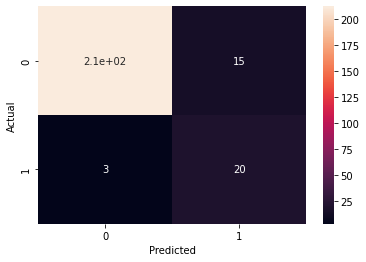

In [59]:
confusion_matrix = pd.crosstab(y_test, preds, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

From the above Heatmap, confusion matrix tells us that:

15 passengers who did not survive are wrongly predicted as survivors (False Positives)

3 passengers who survived are wrongly predicted as dead (False Negatives)

186 passengers who died also predicted as dead (True Positives)

20 passengers who survived are also predicted as survivors (True Negatives)

Accuracy:
How many correct predictions have we made from all the observations? Accuracy = (TP+TN)/(TP+FP+FN+TN)= 92.8%

Recall:
Out of all the passengers that died, how many did we get correct? Recall = TP/(TP+FN)= 98.4%

Precision:
Out of all the passengers that we predicted to be dead, how many did we actually get right? Precision= TP/(TP+FP)= 92.5%

**Another Validation Matrix: ROC/AUC**

AUC - ROC curve is a performance measurement for classification problems at various threshold settings. ROC (Receiver Operating Characteristic) is a probability curve and AUC (Area Under the Curve) represents the degree or measure of separability. It tells how much the model is capable of distinguishing between classes. The higher the AUC, the better the model is at predicting 0 classes as 0 and 1 classes as 1. By analogy, the Higher the AUC, the better the model is at distinguishing between passengers who survived and those who did not.

The ROC curve summarizes all of the confusion matrices that each threshold produced and is plotted with True Positive Rate (TPR) which is the same thing as recall metric (or sensitivity) against the False Positive Rate (FPR) where TPR is on the y-axis and FPR is on the x-axis.

In [60]:
 import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

ROC_AUC_score for Logistic Regression:  0.9017429611185597


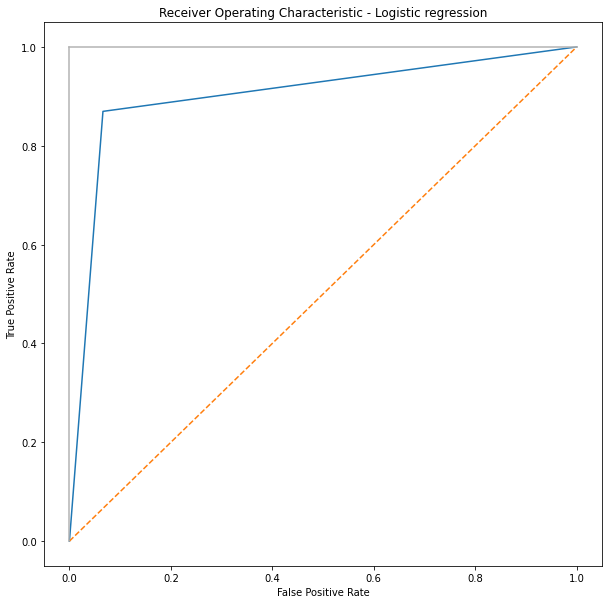

In [62]:
# Creating False and True Positive Rates and printing Score
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, preds)
print('ROC_AUC_score for Logistic Regression: ', roc_auc_score(y_test, preds))
# Plot's size
plt.subplots(1, figsize=(10,10))
# Plot's title 
plt.title('Receiver Operating Characteristic - Logistic regression')
# Plot ROC Curve 
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
# axis labels
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
# show the plot
plt.show()

Our ROC-AUC_Score is equal to 0.9 which denotes a very good classifier able to predict passengers that are actually dead as dead and passengers that are actually alive as survivors.